In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rn
from scipy import stats
import seaborn as sns
G = 1629562571
np.random.seed(G)
#from pandas_datareader import data as pdr
from datetime import datetime 
from datetime import datetime
import antropy as ant

import pytse_client as tse
import antropy as ant
np.set_printoptions(suppress=True)

In [41]:
def get_data(symbol, start_date, end_date):
    tickers = tse.download(symbols=symbol, write_to_csv=True)
    raw = pd.DataFrame.from_dict(tickers[symbol])
    raw = raw.set_index('date')
    raw.drop(['open', 'high', 'low', 'value', 'volume', 'count', 'yesterday', 'close'], axis=1, inplace=True)
    #start_date = '2021-01-01'
    #end_date = '2022-11-29'

    raw = raw[(raw.index > start_date) & (raw.index <= end_date)]
    df = raw.rename(columns={'adjClose':'Price'}, inplace=True)
    raw['Return'] = np.log(raw['Price'] / raw['Price'].shift(1))
    raw = raw.reindex(index=raw.index[::-1])
    
    return raw

In [42]:
def get_PI(raw):
    
    s1 = []
    for x in range(0, len(raw['Return'])):
        s1.append(raw['Return'][x])
    raw1 = pd.DataFrame({'Daily vol': s1})
    M = int(len(raw1))
    T=1
    N=100
    h=T/N
    u=1e-11*h
    Number = np.ones((M,N))
    Return = np.zeros((M,N))
    s0 = raw['Return'][10]
    underlying = s0*np.ones((M,N+1))
    for x in range(0,M):
        for y in range(0,N):
            a = rn.randint(0,len(raw1))
            Number[x,y] = a
            Return[x,y] = raw1['Daily vol'].iloc[a]
    for i in range(0,N):
        underlying[:,i+1] = underlying[:,i]*(1+Return[:, i])
    a = [ rn.randint(0,M) for j in range(1,100) ]
    for runer in a:
        p=np.arange(0,(T+h-u),h),Return[runer]
    rd = pd.DataFrame(Return)
    rd.set_index(0)
    a = []
    for i in range(0, 100):
        b = ant.app_entropy(rd[i])
        a.append(b)
    ApEn_mont_vol = max(a)
    
    ApEn_org_vol = ant.app_entropy(raw['Return'])
    PI = ApEn_org_vol / ApEn_mont_vol
    
    return PI
    





    

In [43]:
raw = get_data('خودرو', '2012-01-22', '2024-08-22')
raw.dropna(inplace=True)
raw

,Price,Return
date,,
2024-08-21,2363.0,0.008073
2024-08-20,2344.0,-0.013560
2024-08-19,2376.0,0.012280
2024-08-18,2347.0,0.014160
2024-08-17,2314.0,0.010863
...,...,...
2012-01-31,2119.0,-0.004708
2012-01-30,2129.0,-0.003751
2012-01-29,2137.0,-0.001870


In [44]:
P = raw["Price"]

In [45]:
%%time
PI = raw.groupby(pd.Grouper(freq='360D'))[['Return']].apply(get_PI)



/var/folders/bz/k1rg7s0j16x3yh6pt4qts77m0000gn/T/ipykernel_20441/3431170013.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s1.append(raw['Return'][x])
/var/folders/bz/k1rg7s0j16x3yh6pt4qts77m0000gn/T/ipykernel_20441/3431170013.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s0 = raw['Return'][10]
/var/folders/bz/k1rg7s0j16x3yh6pt4qts77m0000gn/T/ipykernel_20441/3431170013.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

CPU times: user 1.6 s, sys: 16.4 ms, total: 1.61 s
Wall time: 1.62 s


/var/folders/bz/k1rg7s0j16x3yh6pt4qts77m0000gn/T/ipykernel_20441/3431170013.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s1.append(raw['Return'][x])
/var/folders/bz/k1rg7s0j16x3yh6pt4qts77m0000gn/T/ipykernel_20441/3431170013.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s0 = raw['Return'][10]


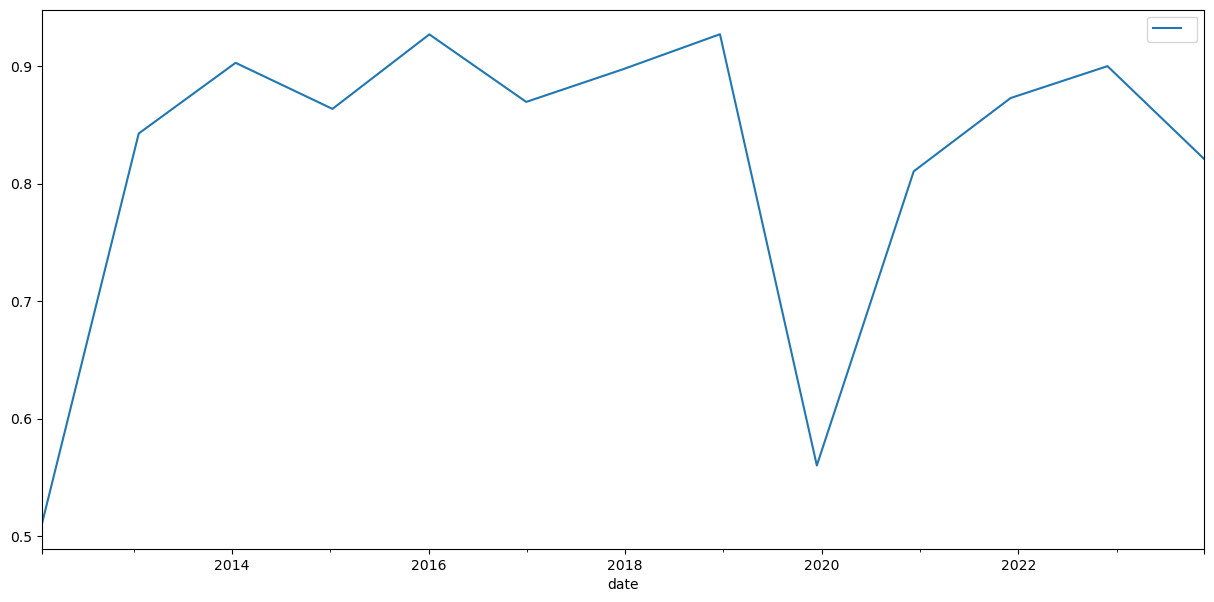

In [46]:
PI.plot(legend=True, figsize =(15,7))
plt.show()

In [49]:
pip install ts2vg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.9 kB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


KeyboardInterrupt: 

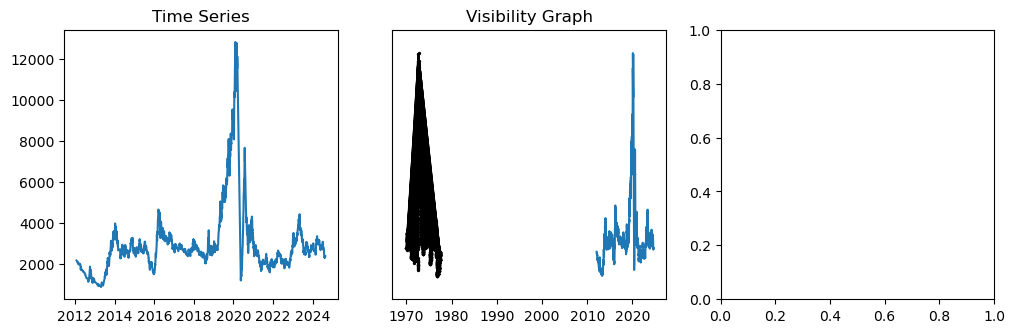

In [51]:
import networkx as nx
from ts2vg import NaturalVG

g = NaturalVG(directed=None).build(P)
nxg = g.as_networkx()

# 3. Make plots
fig, [ax0, ax1, ax2] = plt.subplots(ncols=3, figsize=(12, 3.5))

ax0.plot(P)
ax0.set_title("Time Series")

graph_plot_options = {
    "with_labels": False,
    "node_size": 2,
    "node_color": [(0, 0, 0, 1)],
    "edge_color": [(0, 0, 0, 0.15)],
}

nx.draw_networkx(nxg, ax=ax1, pos=g.node_positions(), **graph_plot_options)
ax1.tick_params(bottom=True, labelbottom=True)
ax1.plot(P)
ax1.set_title("Visibility Graph")

nx.draw_networkx(nxg, ax=ax2, pos=nx.kamada_kawai_layout(nxg), **graph_plot_options)
ax2.set_title("Visibility Graph")

Text(0.5, 1.0, 'Visibility Graph')

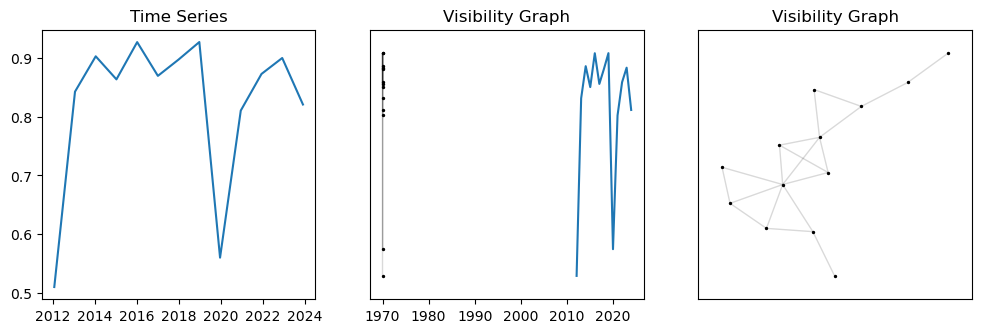

In [55]:
import networkx as nx
from ts2vg import NaturalVG

g = NaturalVG(directed=None).build(PI)
nxg = g.as_networkx()

# 3. Make plots
fig, [ax0, ax1, ax2] = plt.subplots(ncols=3, figsize=(12, 3.5))

ax0.plot(PI)
ax0.set_title("Time Series")

graph_plot_options = {
    "with_labels": False,
    "node_size": 2,
    "node_color": [(0, 0, 0, 1)],
    "edge_color": [(0, 0, 0, 0.15)],
}

nx.draw_networkx(nxg, ax=ax1, pos=g.node_positions(), **graph_plot_options)
ax1.tick_params(bottom=True, labelbottom=True)
ax1.plot(PI)
ax1.set_title("Visibility Graph")

nx.draw_networkx(nxg, ax=ax2, pos=nx.kamada_kawai_layout(nxg), **graph_plot_options)
ax2.set_title("Visibility Graph")

In [57]:
PI = pd.DataFrame(PI)

PI.tail(59)

,0
date,
2012-01-25,0.510199
2013-01-19,0.842594
2014-01-14,0.902724
2015-01-09,0.863525
2016-01-04,0.926906
2016-12-29,0.869465
2017-12-24,0.897280
2018-12-19,0.927043
2019-12-14,0.560183


In [59]:
## Calculating the one month rolling mean and standard deviation

pii = PI.rolling(window=3).agg(['mean', 'std'], axis='rows')
pii.dropna(inplace=True)
pii

TypeError: Rolling.mean() got an unexpected keyword argument 'axis'

In [61]:
pi_all = PI.join(pii)
pi_all.dropna(inplace=True)

NameError: name 'pii' is not defined

In [63]:
## Defining a function to catch outliers

def catch_outliers(row, n_sigmas=3):
    x = row['pincus_index']
    μ = row['mean']
    σ = row['std']
    
    if (x > μ + 3 * σ) | (x < μ - 3 * σ):
        return 1
    else:
        return 0

In [65]:
pi_all['outlier'] = pi_all.apply(catch_outliers, axis='columns')

NameError: name 'pi_all' is not defined

<Axes: xlabel='date'>

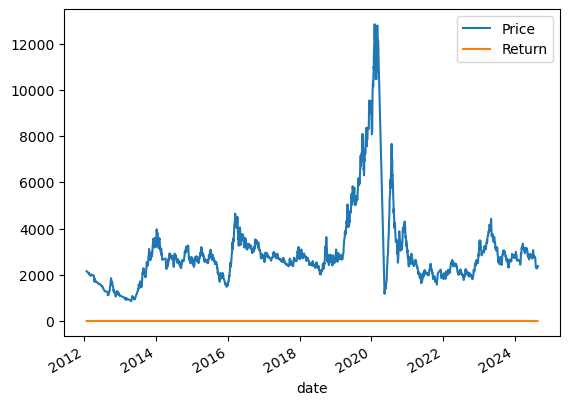

In [67]:
raw.plot()

In [69]:
###### Calculating the one month rolling mean and standard deviation

df1_rolling_stats = PI.rolling(window=30).agg(['mean', 'std'], axis='rows')
df1_rolling_stats

TypeError: Rolling.mean() got an unexpected keyword argument 'axis'

In [71]:
%%time
PI = pd.DataFrame(PI)
PI

CPU times: user 178 μs, sys: 19 μs, total: 197 μs
Wall time: 192 μs


,0
date,
2012-01-25,0.510199
2013-01-19,0.842594
2014-01-14,0.902724
2015-01-09,0.863525
2016-01-04,0.926906
2016-12-29,0.869465
2017-12-24,0.897280
2018-12-19,0.927043
2019-12-14,0.560183


In [73]:
end1 = datetime.date(2022, 12, 15)
start1 = datetime.date(2020, 7, 1)
ticker1 = "GC=F"

TypeError: descriptor 'date' for 'datetime.datetime' objects doesn't apply to a 'int' object

In [75]:
df = yf.download(ticker1, start=start1, end=end1, progress=False)
print(f"Downloaded {df.shape[0]} rows and {df.shape[1]} columns of {ticker1} data")

NameError: name 'yf' is not defined

In [77]:
df

NameError: name 'df' is not defined

In [79]:
df = df.drop(['Open', 'High', 'Low', 'Volume', 'Close'], axis=1, inplace=True)


df = df.rename(columns={'Adj Close':'Price'}, inplace=True)
df['Return'] = np.log(df['Price'] / df['Price'].shift(1))
#raw = raw.reindex(index=raw.index[::-1])


NameError: name 'df' is not defined

In [81]:
df = df.rename(columns={'Adj Close':'Price'}, inplace=True)
df

NameError: name 'df' is not defined

In [83]:
df


NameError: name 'df' is not defined